# Notebook Machine Learning : prédictions des métriques des simulations

In [359]:
import pandas as pd
import matplotlib.pyplot as plt

Récupération des données

In [360]:
dataframe = pd.read_csv("resultats/resultats14.csv")

dataframe = dataframe[dataframe['epidemic peak'] > 10] ### tri du dataframe en retirant les cas extremes
"""dataframe = dataframe[dataframe['dynamique de propagation'] == 3]"""

"dataframe = dataframe[dataframe['dynamique de propagation'] == 3]"

Tri des caractéristiques utiles

In [361]:
var = dataframe.columns.drop(['epidemic peak', 'time to extinction', 'proportion propagation', 'probabilite I -> S', 'probabilite S -> R', 'degre du noeud source', 'dynamique de propagation'])
X = dataframe[var]
Y = dataframe[['epidemic peak']]

In [362]:
X.shape

(17408, 10)

In [363]:
"""import math
X['probabilite I -> S']=X['probabilite I -> S'].map(lambda a : math.log(a)**2)
X['probabilite S -> R']=X['probabilite S -> R'].map(lambda a : math.log(a)**2)
print(X['probabilite I -> S'].head(10))
print(X['probabilite S -> R'].head(10))"""

"import math\nX['probabilite I -> S']=X['probabilite I -> S'].map(lambda a : math.log(a)**2)\nX['probabilite S -> R']=X['probabilite S -> R'].map(lambda a : math.log(a)**2)\nprint(X['probabilite I -> S'].head(10))\nprint(X['probabilite S -> R'].head(10))"

In [364]:
pb_58 = dataframe[dataframe['epidemic peak'] == 58]
print("nombre de pics à 58 dans le dataframe", pb_58.shape)
p57 = dataframe[dataframe['epidemic peak'] == 57]
print("nombre de pics à 57 dans le dataframe", p57.shape)
p59 = dataframe[dataframe['epidemic peak'] == 59]
print("nombre de pics à 59 dans le dataframe", p59.shape)
p64 = dataframe[dataframe['epidemic peak'] == 77]
print("nombre de pics à 77 dans le dataframe", p64.shape)
p64 = dataframe[dataframe['epidemic peak'] == 66]
print("nombre de pics à 66 dans le dataframe", p64.shape)



nombre de pics à 58 dans le dataframe (193, 17)
nombre de pics à 57 dans le dataframe (216, 17)
nombre de pics à 59 dans le dataframe (195, 17)
nombre de pics à 77 dans le dataframe (266, 17)
nombre de pics à 66 dans le dataframe (249, 17)


In [365]:
X.head(10)

,nombre de noeuds,nombre d'aretes,degre moyen,degre minimal,degre maximal,distance moyenne,nombre de honeypots,nombre de smart honeypots,nombre inf 5,nombre res 5
0,131,374,5.709924,3,10,4.935995,6,0,11,35
1,116,326,5.620690,3,11,4.869115,21,10,11,14
2,116,328,5.655172,3,10,4.737031,24,9,6,7
3,112,318,5.678571,3,10,4.486969,2,0,13,2
4,131,375,5.725191,3,9,4.883500,5,0,14,26
5,137,393,5.737226,3,9,4.929369,28,8,10,20
6,86,240,5.581395,3,10,3.982763,19,4,8,16
7,132,375,5.681818,4,9,5.174416,9,1,11,12
8,119,337,5.663866,3,9,4.704743,4,2,14,20
9,80,225,5.625000,3,9,3.840823,6,1,13,22


Pré-traitement des données : encodage factice

In [366]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [367]:
### prétraitement des données catégorielles (ici le type de propagation)
"""ct = ColumnTransformer([("PropagationType", OneHotEncoder(), [6])], remainder="passthrough", sparse_threshold=0, verbose=True)
X = ct.fit_transform(X)  ### encodage factice"""
sc_x = StandardScaler()
sc_y = StandardScaler()

Division du dataset en 3 ensembles : Train, Test et Validation

In [368]:
from sklearn.model_selection import train_test_split

In [369]:
x_train1, x_test, y_train1, y_test = train_test_split(X, Y, test_size=0.15, random_state=1, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=(0.15/0.85), random_state=12, shuffle= True)

Pré-traitement des données : normalisation

In [370]:
### normalisation des x
x_train = sc_x.fit_transform(x_train)
x_val = sc_x.transform(x_val)
x_test = sc_x.transform(x_test)

### normalisation des y 
y_train = sc_y.fit_transform(y_train)
y_val = sc_y.transform(y_val)
y_test = sc_y.transform(y_test)

## Création du modèle

In [371]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

In [372]:
model = Sequential()

## couches cachées
model.add(Dense(160, input_dim = 10, activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0,2))
## couche de sortie
model.add(Dense(1, activation = 'linear'))


model.summary()

c:\Users\yassi\.julia\conda\3\x86_64\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 160)            │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,361 (200.63 KB)

 Trainable params: 51,361 (200.63 KB)

 Non-trainable params: 0 (0.00 B)

In [373]:
model.compile(optimizer=optimizers.Adam(learning_rate=3e-4), loss = 'mean_absolute_percentage_error', metrics=[metrics.RootMeanSquaredError()])

In [374]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_root_mean_squared_error', patience=20, verbose=1, start_from_epoch=100, restore_best_weights=True)

Entraînement

In [375]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs= 300, batch_size = 32, shuffle = True, callbacks=[callback]) 

Epoch 1/300
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 175.1742 - root_mean_squared_error: 0.9751 - val_loss: 149.9398 - val_root_mean_squared_error: 0.9696
Epoch 2/300
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 152.8095 - root_mean_squared_error: 0.9660 - val_loss: 123.9013 - val_root_mean_squared_error: 0.9829
Epoch 3/300
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 123.2980 - root_mean_squared_error: 0.9869 - val_loss: 108.8924 - val_root_mean_squared_error: 0.9939
Epoch 4/300
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 118.2491 - root_mean_squared_error: 0.9815 - val_loss: 113.4577 - val_root_mean_squared_error: 0.9734
Epoch 5/300
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 107.8434 - root_mean_squared_error: 0.9651 - val_loss: 105.5739 - val_root_mean_squared_error: 0.9413
Epoch 6/300
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 105.6734 - root_mean_squared_error: 0.9099 - val_loss: 91.8528 - val_root_mean_squared_error: 0.8126
Epoch 7/300
381/381 ━━━

Métriques d'évaluations

In [376]:
def plot_training_analysis():
  acc = history.history['root_mean_squared_error']
  val_acc = history.history['val_root_mean_squared_error']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training RMSE')
  plt.plot(epochs, val_acc, 'g', label='Validation RMSE')
  plt.title('Training and validation rmse')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--", linewidth = 4, label='Training loss MAPE')
  plt.plot(epochs, val_loss,'g', label='Validation loss MAPE')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

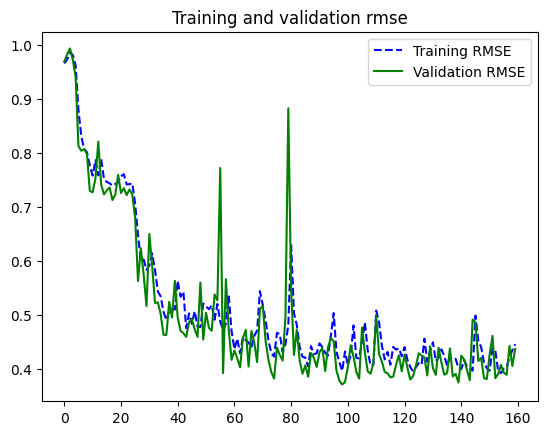

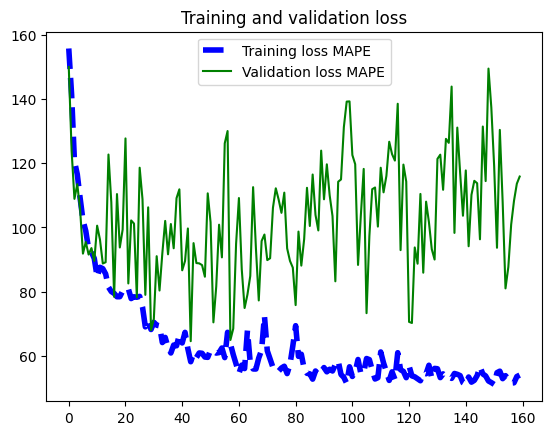

In [377]:
plot_training_analysis()

Evaluation des métriques sur les valeurs non normalisées

In [378]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)
###
y_pred_train_denorm = sc_y.inverse_transform(y_pred_train)
y_pred_val_denorm = sc_y.inverse_transform(y_pred_val)
y_pred_test_denorm = sc_y.inverse_transform(y_pred_test)
###
y_train_denorm = sc_y.inverse_transform(y_train)
y_val_denorm = sc_y.inverse_transform(y_val)
y_test_denorm = sc_y.inverse_transform(y_test)

381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step


In [379]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [380]:
rmse = mean_squared_error(y_test_denorm, y_pred_test_denorm, squared= False)
mae_train = mean_absolute_error(y_train_denorm, y_pred_train_denorm)
rmse_train = mean_squared_error(y_train_denorm, y_pred_train_denorm, squared=False)
mae_val = mean_absolute_error(y_val_denorm, y_pred_val_denorm)
rmse_val= mean_squared_error(y_val_denorm, y_pred_val_denorm, squared=False)
r2_test = r2_score(y_pred_test_denorm, y_test_denorm)
print(f"Train Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Train Mean Absolute Error (MAE): {mae_train}")
print(f"Val Root Mean Squared Error (RMSE): {rmse_val}")
print(f"Val Mean Absolute Error (MAE): {mae_val}")
print(f"Test Root Mean Squared Error (RMSE): {rmse}")
print(f"Test R2-score : {r2_test}")

Train Root Mean Squared Error (RMSE): 11.245122951098587
Train Mean Absolute Error (MAE): 7.70415560221217
Val Root Mean Squared Error (RMSE): 10.891735556916672
Val Mean Absolute Error (MAE): 7.765208134698649
Test Root Mean Squared Error (RMSE): 11.359957982041712
Test R2-score : 0.7990736080461033


c:\Users\yassi\.julia\conda\3\x86_64\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yassi\.julia\conda\3\x86_64\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\yassi\.julia\conda\3\x86_64\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Histogramme sur l'erreur sur les ensembles de test et de validation

In [381]:
erreur_norm = []
nb_0 = 0
for i in range(len(y_pred_test)): 
  if y_test_denorm[i]!=0:
    val = 100*abs(y_pred_test_denorm[i] - y_test_denorm[i])/y_test_denorm[i]
    erreur_norm.append(val.item())
  else:
    nb_0 = nb_0+1
  
erreur_norm_val = []
for i in range(len(y_pred_val)): 
  if y_val_denorm[i]!=0:
    val = 100*abs(y_pred_val_denorm[i] - y_val_denorm[i])/y_val_denorm[i]
    erreur_norm_val.append(val.item())
  else:
    pass

In [382]:
print(f"Il y a un nombre de {nb_0} zéros")

Il y a un nombre de 0 zéros


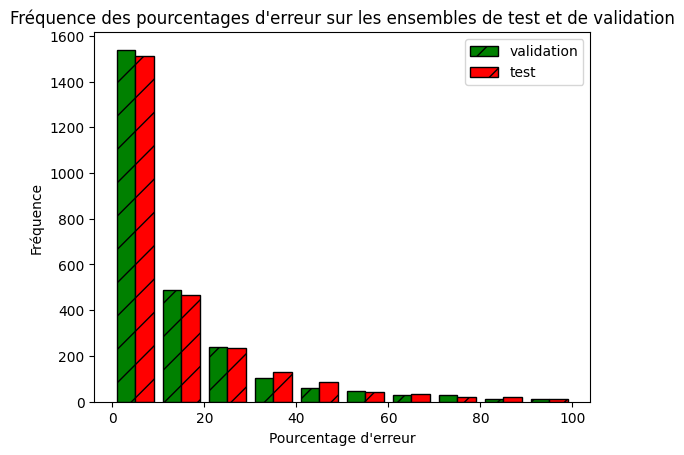

In [383]:
plt.hist([erreur_norm_val, erreur_norm],range=(0,100), bins=10, color=['green', 'red'], edgecolor='black', hatch='/', label=['validation', 'test'])
plt.xlabel("Pourcentage d'erreur")
plt.ylabel("Fréquence")
plt.title("Fréquence des pourcentages d'erreur sur les ensembles de test et de validation")
plt.legend()
plt.show()

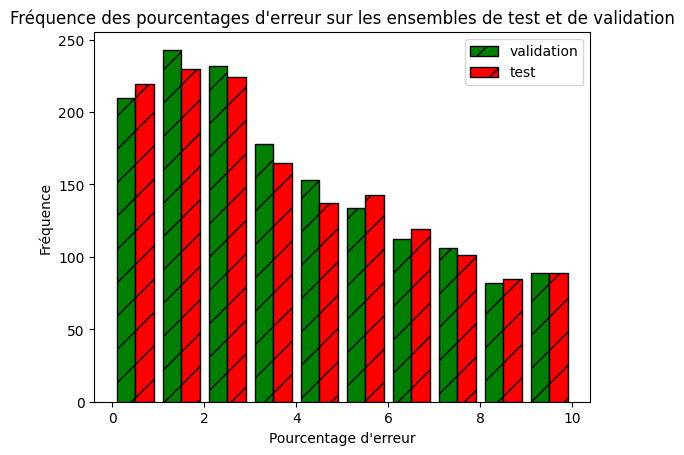

In [384]:
plt.figure()
plt.hist([erreur_norm_val, erreur_norm],range=(0,10), bins=10, color=['green', 'red'], edgecolor='black', hatch='/', label=['validation', 'test'])
plt.xlabel("Pourcentage d'erreur")
plt.ylabel("Fréquence")
plt.title("Fréquence des pourcentages d'erreur sur les ensembles de test et de validation")
plt.legend()
plt.show()

In [385]:
print("============================= Vérité Terrain ===================================")
print(y_test_denorm[:50])
print("============================= Prédictions ===================================")
print(y_pred_test_denorm[:50])

============================= Vérité Terrain ===================================
[[104.]
 [ 43.]
 [143.]
 [139.]
 [ 75.]
 [ 86.]
 [ 78.]
 [ 65.]
 [ 48.]
 [ 77.]
 [120.]
 [ 43.]
 [ 66.]
 [ 55.]
 [104.]
 [ 75.]
 [112.]
 [ 60.]
 [118.]
 [ 35.]
 [ 81.]
 [ 39.]
 [ 64.]
 [ 65.]
 [ 94.]
 [ 48.]
 [ 69.]
 [ 59.]
 [ 46.]
 [105.]
 [102.]
 [ 60.]
 [ 91.]
 [ 48.]
 [ 35.]
 [ 14.]
 [ 55.]
 [ 87.]
 [ 79.]
 [ 66.]
 [ 13.]
 [ 71.]
 [ 43.]
 [ 35.]
 [ 79.]
 [ 67.]
 [ 95.]
 [ 58.]
 [ 52.]
 [ 26.]]
============================= Prédictions ===================================
[[102.48399 ]
 [ 71.451195]
 [138.4961  ]
 [140.4804  ]
 [ 72.00967 ]
 [ 84.70575 ]
 [ 72.00967 ]
 [ 61.756187]
 [ 58.080635]
 [ 72.00967 ]
 [118.935745]
 [ 38.17449 ]
 [ 72.00967 ]
 [ 72.00967 ]
 [ 97.48899 ]
 [ 72.00967 ]
 [110.40699 ]
 [ 65.30599 ]
 [ 97.562744]
 [ 49.75917 ]
 [ 72.00967 ]
 [ 24.706501]
 [ 72.00967 ]
 [ 72.00967 ]
 [ 90.28878 ]
 [ 43.86538 ]
 [ 66.98179 ]
 [ 72.0097  ]
 [ 72.00967 ]
 [108.76595 ]
 [ 94.5689  ]
 [ 47.

In [386]:
print("============================= Vérité Terrain ===================================")
print(y_test_denorm[100:150])
print("============================= Prédictions ===================================")
print(y_pred_test_denorm[100:150])

============================= Vérité Terrain ===================================
[[ 53.]
 [ 45.]
 [ 89.]
 [ 97.]
 [ 54.]
 [ 88.]
 [ 63.]
 [ 27.]
 [ 28.]
 [ 95.]
 [ 57.]
 [ 60.]
 [ 90.]
 [120.]
 [ 81.]
 [ 83.]
 [ 67.]
 [108.]
 [ 47.]
 [ 31.]
 [ 71.]
 [107.]
 [ 81.]
 [115.]
 [ 81.]
 [100.]
 [ 93.]
 [ 12.]
 [ 58.]
 [ 36.]
 [ 53.]
 [ 90.]
 [ 17.]
 [ 95.]
 [ 37.]
 [ 49.]
 [ 66.]
 [ 65.]
 [ 40.]
 [ 68.]
 [ 42.]
 [136.]
 [ 58.]
 [ 36.]
 [ 88.]
 [ 89.]
 [ 83.]
 [ 75.]
 [ 79.]
 [116.]]
============================= Prédictions ===================================
[[ 59.61328 ]
 [ 47.110764]
 [ 72.00967 ]
 [ 97.36241 ]
 [ 72.00967 ]
 [ 84.66815 ]
 [ 72.00967 ]
 [ 13.570099]
 [ 49.673565]
 [ 97.96184 ]
 [ 58.726402]
 [ 61.908752]
 [ 95.92784 ]
 [123.80003 ]
 [ 72.017235]
 [ 72.00967 ]
 [ 72.00967 ]
 [109.63036 ]
 [ 50.382465]
 [ 25.062523]
 [ 72.00967 ]
 [ 97.63972 ]
 [ 72.00967 ]
 [114.419525]
 [ 72.00967 ]
 [ 97.852554]
 [ 72.00967 ]
 [ 20.07415 ]
 [ 72.00967 ]
 [ 53.7957  ]
 [ 54.283836]
 [ 75.

In [387]:
x_test_denorm = sc_x.inverse_transform(x_test)
print(x_test_denorm[:50])

[[121.         346.           5.71900826   3.          11.
    4.61336088   6.           3.          39.          10.        ]
 [112.         319.           5.69642857   3.           9.
    4.55984556  13.           4.          11.          24.        ]
 [145.         413.           5.69655172   3.           9.
    5.29750958  28.           1.          49.           2.        ]
 [146.         415.           5.68493151   3.          10.
    5.27482286  20.           3.          60.           3.        ]
 [137.         396.           5.7810219    3.           9.
    4.78445685  17.           2.          49.          39.        ]
 [ 96.         269.           5.60416667   3.           8.
    4.45723684  14.           7.          35.           5.        ]
 [ 87.         245.           5.63218391   3.           9.
    4.12830794   0.           0.          18.           7.        ]
 [111.         314.           5.65765766   3.           9.
    4.67239967  23.           7.          24.       